<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류
## 분류의 개요
지도 학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다. 지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근점(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

앙상블은 분류에서 가장 각광으 받는 방법 중 하나로, 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용되고 있다.

앙상블은 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다. 배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘이지만, 근래의 앙상블은 부슽이 방식으로 지속해서 발전하고 있다. 부스팅의 효시라고 할 수 있는 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠다. 다만, XgBoost(eXtra Gradient Boost)와 Light GBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡았다.

앙상블은 서로 다른/또는 같은 알고리즘을 결합한다고 했는데, 대부분은 동일한 알고리즘을 결합한다. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리이다.

결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘이며, 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있다. 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용한다. 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문이다.

## 결정 트리
결정 트리(Decision Tree)는 데이터에 있는 규칙을 학습해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것으로 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

다음 그림은 결정 트리의 구조를 간략하게 나타낸 것이다. 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다. 그리고 새로운 규칙마다 서브 트리(Sub Tree)가 생성된다. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다. 하지만, 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 복잡해진다는 것이고 이는 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(Depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

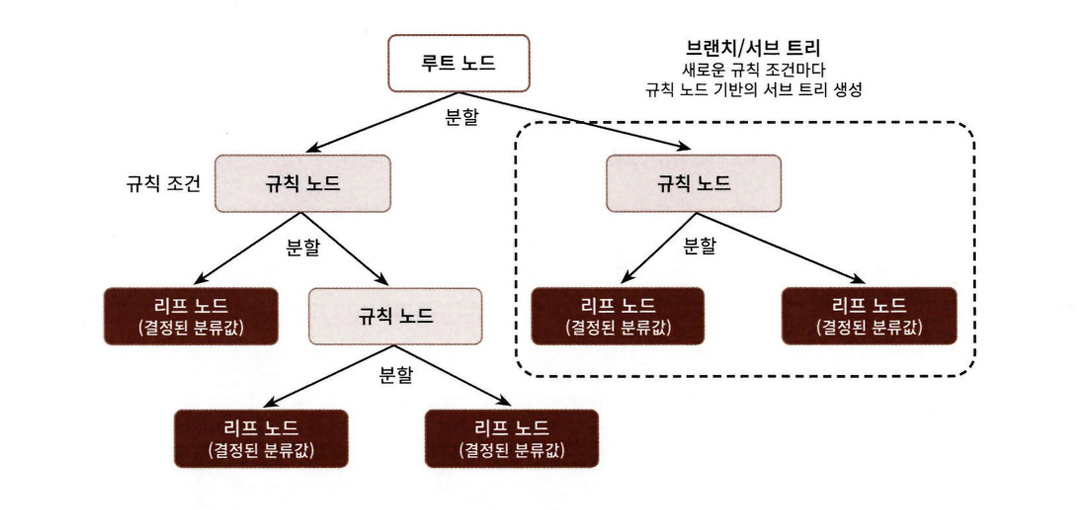

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 어떻게 트리를 분할할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

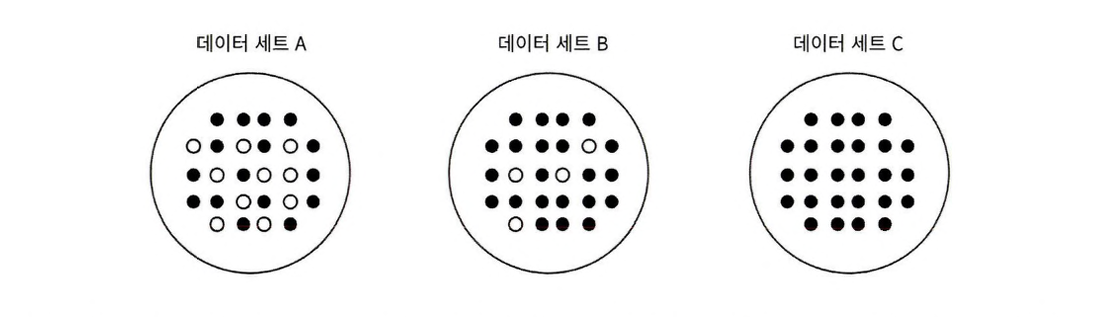

해당 데이터 세트를 봤을 때, C가 가장 균일도가 높고 그 다음 B, A순이다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)지니와 지니 계수가 있다.

- 정보 이득은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할한다.
- 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로, 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

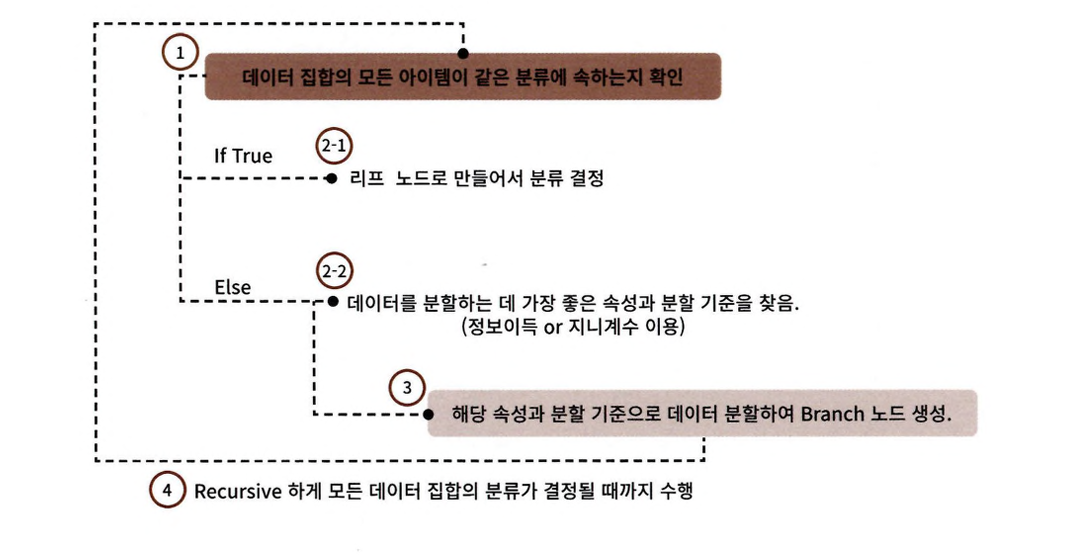

### 결정 트리 모델의 특징
결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적이라는 점이다. 또한, 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다. 반면에 결정 트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없다. 모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 불구하고 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커지고 결과적으로 복잡한 학습 모델에 이르게 된다. 따라서, 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 된다.

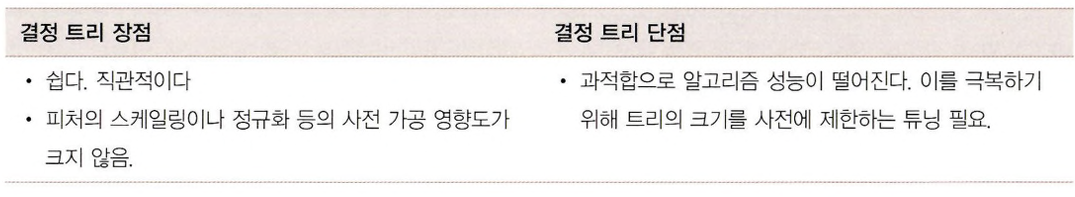

### 결정 트리 파라미터
사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공한다. 사이킷런의 결정 트리 구현은 CART(Classification And Regressor Trees) 알고리즘 기반이다. CART는 분류 뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘이다. DecisionTreeClassifier와 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용한다.

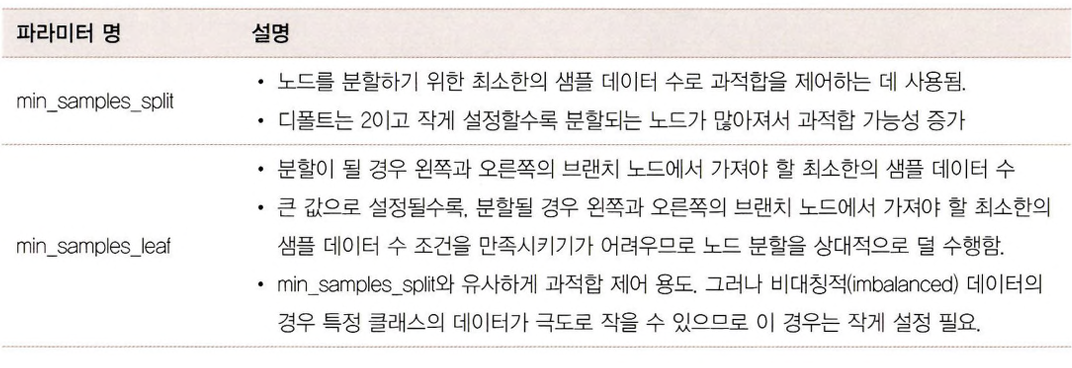

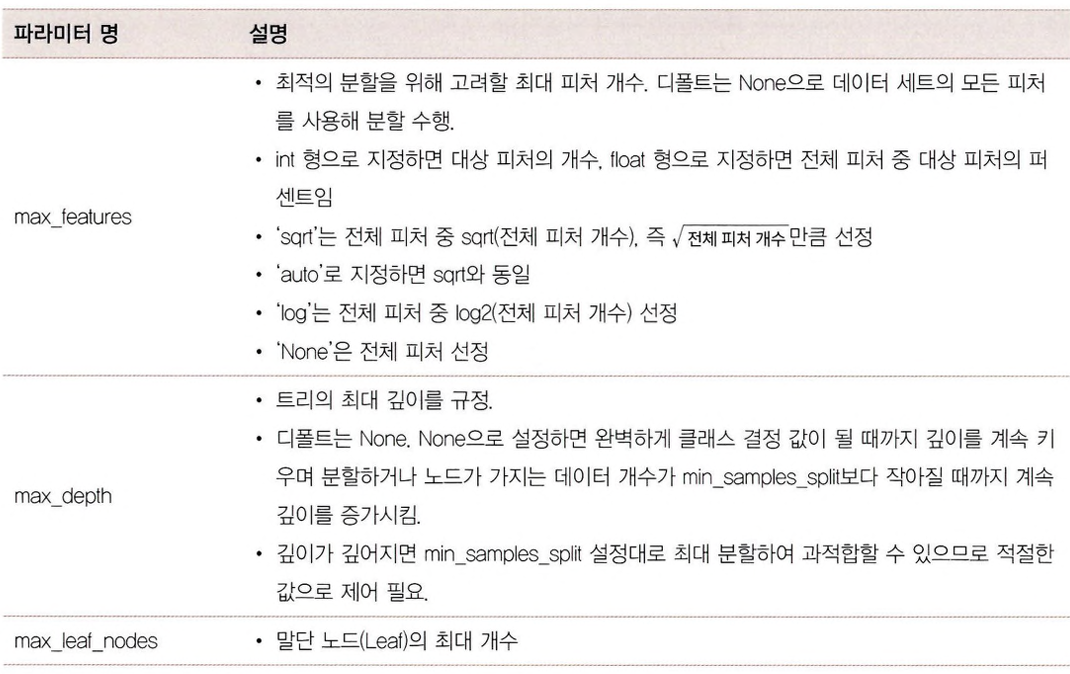

### 결정 트리 모델의 시각화
결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여주는 방법은 Graphviz 패키지를 사용하는 것이다. Graphviz는 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지이다. 사이킷런은 이러한 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz( ) API를 제공한다. 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.



Graphviz를 이용해 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해 보자.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz( ) 함수를 제공한다. export_graphviz( )에 인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭을 입력해주면 된다.

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

이렇게 생성된 출력 파일 'tree.dot'을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

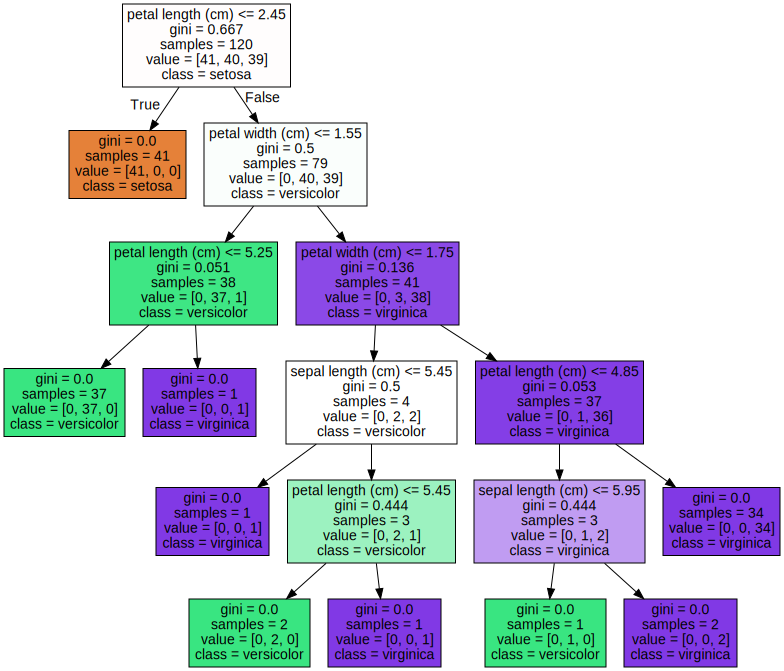

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

출력된 결과를 보면 각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는지 한눈에 알 수 있게 시각화돼 있다.

더 이상 자식 노드가 없는 노드는 리프 노드이다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드이다. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다. 자식 노드가 있는 노드는 브랜치 노드로 자식 노드를 만들기 위한 분할 규칙 조건을 갖고 있다.

- petal length(cm)〈= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드이다.
- gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수이다.
- samples는 현 규칙에 해당하는 데이터 건수이다.
- value = [ ]는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, 0: Setosa, 1: Versicolor, 2: Virginica 품종을 가리킨다.

먼저 루트 노드인 1번 노드의 지표 설명이다.
- samples = 120개는 전체 데이터가 120개라는 의미
- value = [41,40,39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 구성
- sample 120개가 value=[41,40,39] 분포도로 되어 있으므로 지니 계수는 0.667
- petal length(cm) <= 2.45 규칙으로 자식 노드 생성
- class=setosa는 하위 노드를 가질 경우 setosa의 개수가 41개로 제일 많다는 의미

petal_length(cm) <= 2.45 규칙이 True 또는 False로 분기하게 되면 2번, 3번 노드가 만들어진다.

2번 노드는 모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없다. 즉, 2번 노드는 petal length (cm) <=2.45가 True인 규칙으로 생성되는 리프 노드이며, 다음과 같은 의미를 갖는다.
- 41개의 셈플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
- 지니 계수는 0

3번 노드는 Petal length(cn) <= 2.45가 False인 규칙 노드이다.
- 79개의 샘플 데이터 중 Versicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요
- petal width(cm) <= 1.55 규칙으로 자식 노드 생성

4번 노드는 petal width(cm) <= 1.55가 True인 규칙 노드이다.
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 versicolor임
- 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm) <= 5.25라는 새로운 규칙으로 다시 자식 노드 생성

5번 노드는 petal width(cm) <= 1.55가 False인 규칙 노드이다.
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica 38개로 대부분이 Virginica임
- 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width(cm) <=1.75라는 새로운 규칙으로 다시 자식 노드 생성

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다. 주황색은 0: Setosa, 초록색은 1: Versicolor, 보라색은 2: Virginica 레이블을 나타낸다. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.

이처럼 Graphviz를 이용하면 결정 트리 알고리즘의 규칙 생성 트리를 시각적으로 이해할 수 있다.

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어가 모델이 쉽게 과적합되는 문제점을 갖는다. 따라서, 결정 트리 알고맂므을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.

다음은 결정 트리의 max_depth 하이퍼 파라미터 변경에 따른 트리 변화를 나타낸 것이다. max_depth는 결정 트리의 최대 트리 깊이를 제어하며, 이를 3개로 결정하면 더 간단한 결정 트리가 된다.

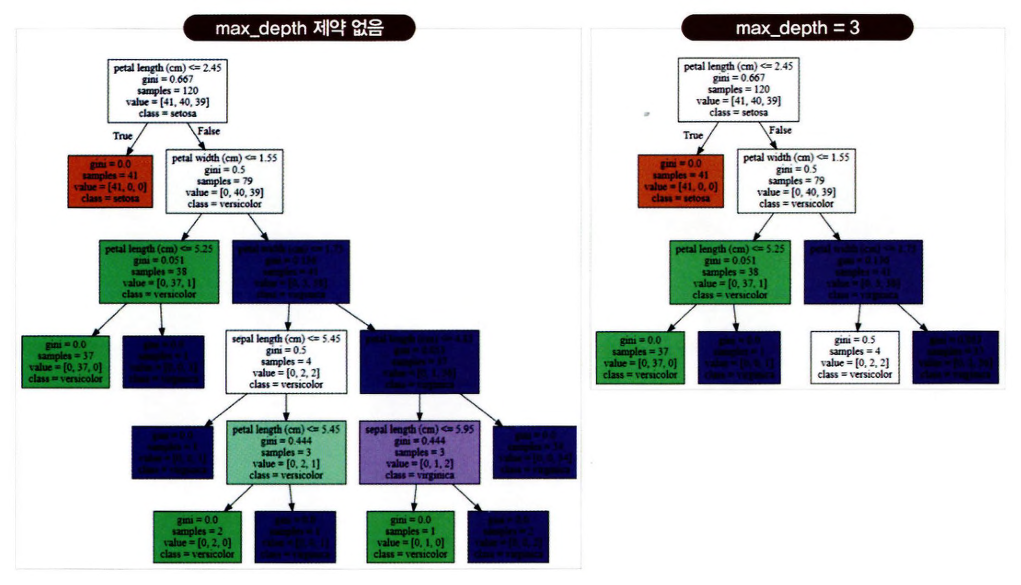

이번에는 min_samples_split 하이퍼 파라미터 변경에 따른 규칙 트리의 변화를 살펴보자. min_samples_splits는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수이다. min_samples_splits=4로 설정한 경우의 결정 트리이다. 맨 아래 리프 노드 중 사선 박스로 표시된 노드를 보면 샘플이 3개인데, 이 노드 안에 value가 [0,2,1]과 [0,1,2]로 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드가 되었다.

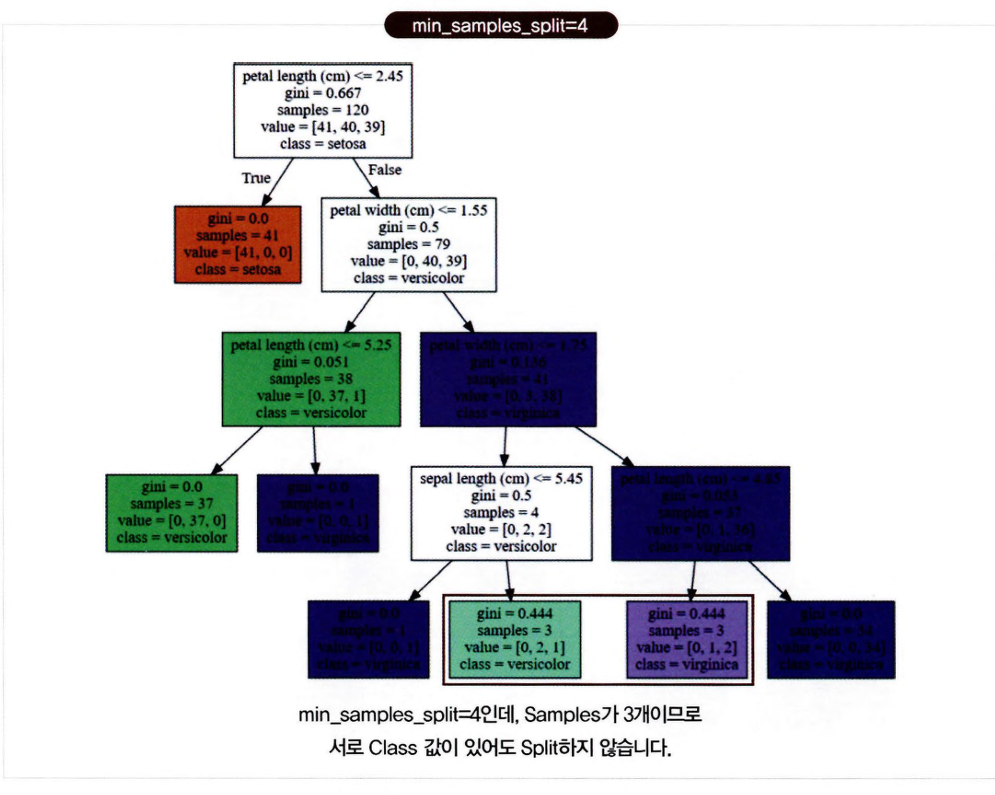

마지막으로 min_samples_leaf 하이퍼 파라미터 변경에 따른 결정 트리의 변화를 살펴보자. min_samples_leaf는 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정한다. 즉, 어떤 노드가 분할할 경우 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 갖게 된다면 해당 노드는 더 이상 분할하지 않고 리프 노드가 된다.

min_samples_leaf의 값을 키우면 리프 노드가 될 수 있는 조건이 상대적으로 완화된다. 보통 분할을 하게 되면 왼쪽, 오른쪽 자식 노드들은 어느 한 쪽의 샘플 데이터 건수는 크고, 다른 쪽의 샘플 데이터 건수는 작아지기 쉬운데 min_samples_leaf를 큰 값으로 지정하면 분할될 때 자식 노드들 모두가 해당 조건을 만족하기에 어려운 조건이 된다. 때문에 min_samples_leaf의 값을 키우게 되면 더 이상 분할되지 않고 리프 노드가 될 수 있는 가능성이 높아진다.

아래는 min_samples_leaf를 4로 변경했을 때의 트리 변화이다. 노드를 분할할 때 왼쪽, 오른쪽 자식 노드가 모두 샘플 데이터 건수 4 이상을 가진 노드가 되어야 하므로 기본값 1로 설정하는 것보다는 조건을 만족하기 어려워 상대적으로 적은 횟수로 분할을 수행한다.

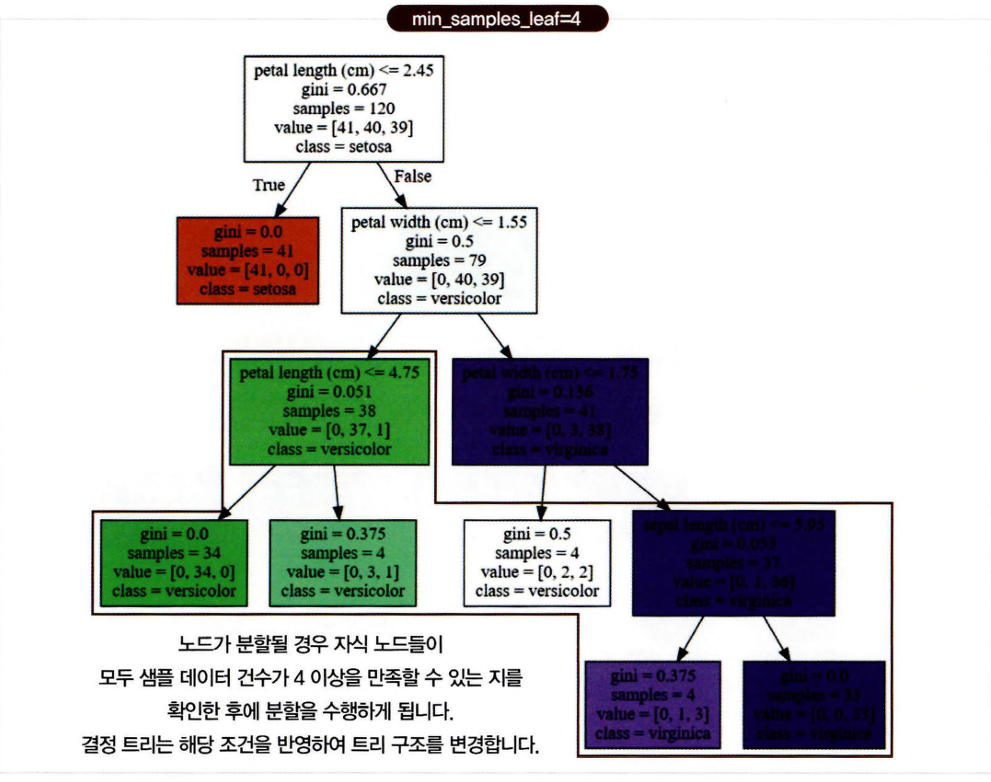

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요하다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있기 때문이다. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공한다.

feqture_importances_는 ndarray 형태로 값을 반환해 피처 순서대로 값이 할당된다. feature_importances_는 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것이다. 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미이다. 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서 중요도를 추출해보자.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

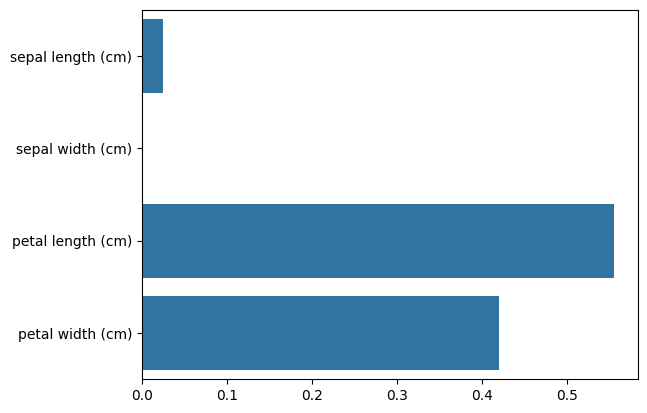

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

여러 피처들 중 petal_length가 가장 피처 중요도가 높음을 알 수 있다.

다른 알고리즘은 내부의 동작 원리가 복잡한 데 반해 결정 트리는 알고리즘 자체가 직관적이기 때문에 알고리즘과 관련된 요소를 시각적으로 표현할 수 있는 다양한 방안이 있다.

### 결정 트리 과적합(Overfitting)
결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보자. 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification( ) 함수를 제공한다. make_classification( ) 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트이다.

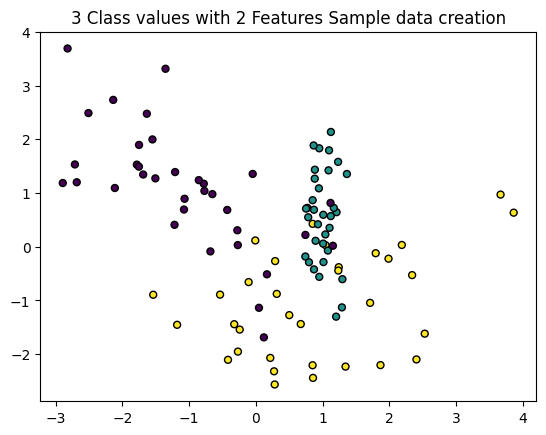

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스의 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 되어 있다. 이제 X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습해보자. 첫 번째 학습시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인해보자. 이를 위해 별도의 함수인 visualize_boundary( )를 생성해 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 분류하는지 잘 이해할 수 있게 해준다.



In [6]:
def visualize_boundary(classifier, X, y):
    # 결정 경계 시각화를 위한 x, y 범위
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # meshgrid에 대해 예측 수행
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

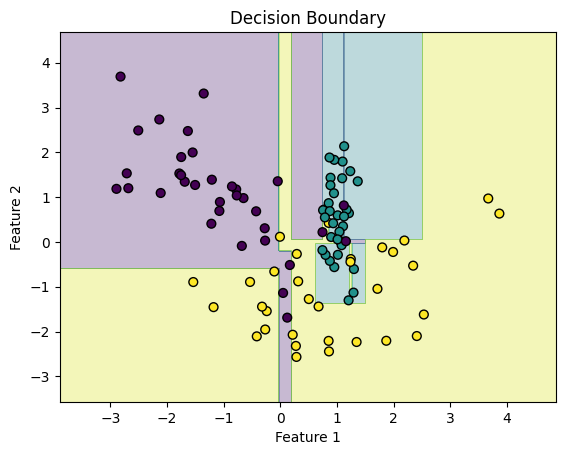

In [7]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

 # 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아졌다. 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다.

이번에는 min_samples_leaf=6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤 하이퍼 파라미터를 변경해 어떻게 결정 기준 경계가 변화하는지 살펴보자.

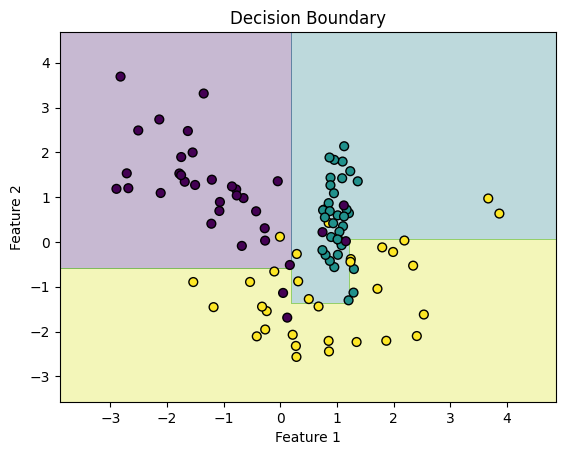

In [8]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다. 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트로 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기에 트리 생성 조건을 제약한 모델이 첫 번째 모델보다 뛰어날 가능성이 높다.

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

이번에는 결정 트리를 이용해 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류를 수행해보자. 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터이다. 수집된 피처 세트를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측해보자.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤, 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 되어 잇음을 유추할 수 있다. 위에서 피처명을 가지고 있는 features.txt파일은 중복된 피처명을 가지고 있어 이를 이용해 데이터 파일을 데이터 세트 DataFrame에 로드하면 오류가 발생한다. 따라서 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 변경한 뒤에 이를 이용해 데이터를 DataFrame에 로드해보자.

In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

42개의 피처명이 중복되어 있다. 이 중복된 피처명에 대해 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 갖는 DF를 반환하는 함수인 get_new_feature_name_df( )를 생성해보자.

In [13]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

피처 데이터 파일과 레이블 데이터 파일을 각각 DataFrame에 로드해보자. 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv( )의 sep 인자로 공백 문자를 입력한다. 해당 데이터 세트는 이후 다른 예제에서도 자주 사용되므로 이 DataFrame을 생성하는 로직을 간단한 함수로 생성해보자.

In [14]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df( )를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트는 7352개의 레코드로 561개의 피처를 가지고 있다. 피처가 전부 float형의 숫자형이므로 별도의 카테고리 인코딩은 수행할 필요가 없다.

In [16]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행해보자. 이때, 하이퍼 파라미터는 모두 디폴트 값으로 설정하며, 하이퍼 파라미터 값을 모두 추출한다.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


약 86.4%의 정확도를 나타낸다.

이번에는 결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴보자. GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키며 예측 성능을 확인해보자.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6,8,10,12,16,20,24],
          'min_samples_split': [16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8일 때의 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.49%로 도출되었다. 5개의 CV 세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results_ 속성을 통해 살펴보자. GridSearchCV 객체의 cv_results_ 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있다.

In [19]:
# GridSearchCV 객체의 cv_results_ 속성을 dataframe으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

param_max_depth  mean_test_score
0                6         0.847662
1                8         0.854879
2               10         0.852705
3               12         0.845768
4               16         0.847127
5               20         0.848624
6               24         0.848624

mean_test_score는 5개 세트에서 검증용 데이터 세트의 정확도 평균 수치이다. 결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다. 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발하게 된다.

이번에는 min_samples_split은 16으로 고정하고 max_depth 변화에 따른 값을 측정해보자.

In [20]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키며 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth= {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth= 6 정확도: 0.8551
max_depth= 8 정확도: 0.8717
max_depth= 10 정확도: 0.8599
max_depth= 12 정확도: 0.8571
max_depth= 16 정확도: 0.8599
max_depth= 20 정확도: 0.8565
max_depth= 24 정확도: 0.8565


max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타낸다. 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야한다. 복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수도 있다.

max_depth와 min_samples_split을 같이 변경하며 정확도 성능을 튜닝해보자.

In [21]:
params = {'max_depth': [8,12,16,20],
          'min_samples_split': [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도로 약 85.49%를 나타낸다. 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용해보자.

In [23]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


max_depth가 8, min_samples_split이 16일 때 테스트 데이터 세트의 예측 정확도는 약 87.17%이다. 결정 트리에서 각 피처의 중효도를 feature_importances_ 속성을 이용해 알아보자.

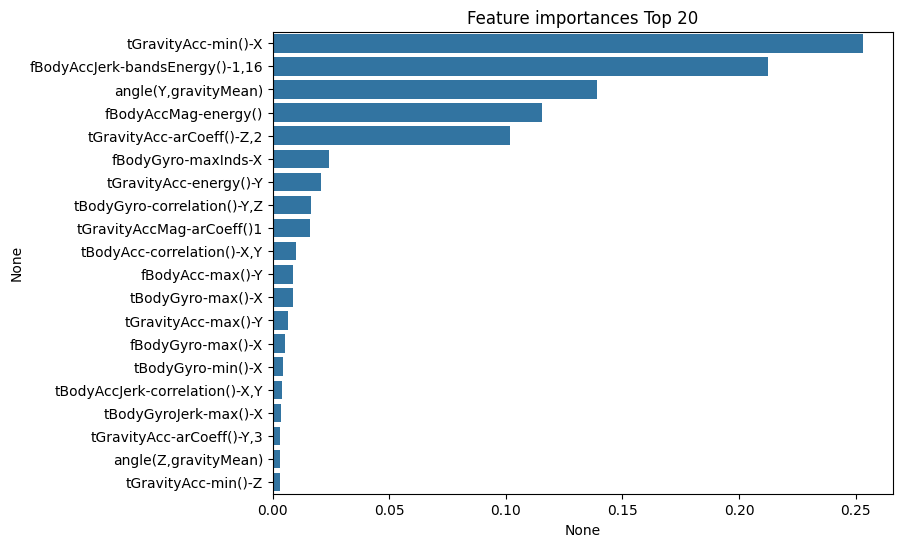

In [27]:
import seaborn as sns

fit_importances_values = best_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(fit_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

확인해보면 가장 높은 중요도를 가진 Top5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있음을 알 수 있다.